In [1]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [2]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')


In [3]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


In [4]:
data

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.00,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.00,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.00,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.00,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.00,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,5.6316,59.00,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,5.6275,39.26,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,5.6932,68.23,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,5.5697,78.02,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [5]:
drop_data = data.copy()

In [6]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [7]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [8]:
#добавление предыдущих значений признаков в пустые места
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [9]:
#вычисление изменения цены

drop_data['devprice'] = (drop_data['USDBRL Curncy'].shift(-1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(-1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'devprice')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(t_data.tail(1).index, inplace=True)

In [10]:
t_data

,Date,devprice,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,0.001616,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,55040.0,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,-0.005494,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,-0.003787,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.002915,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.000048,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2021-12-23,-0.008289,1.1327,1.3408,114.39,20.6433,0.7190,1.3076,76.85,69820.0,...,96.019,212.000,93.500,5.3325,814.75,605.75,231.20,2.3405,2.4952,23.9
3887,2021-12-27,-0.000938,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.011402,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.022419,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0


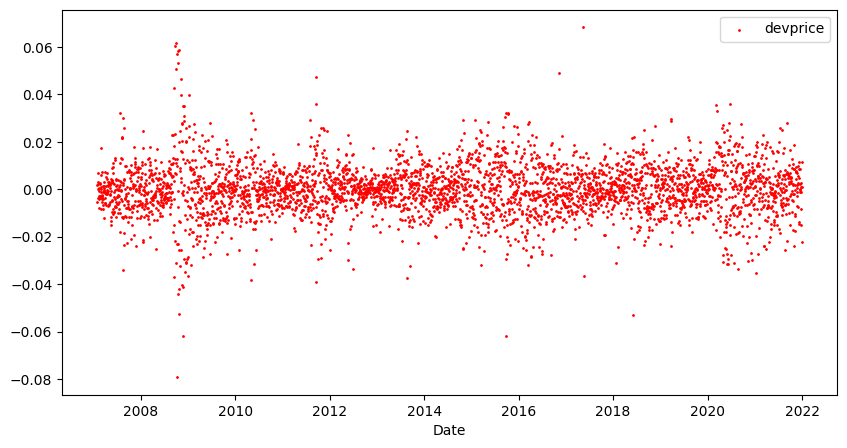

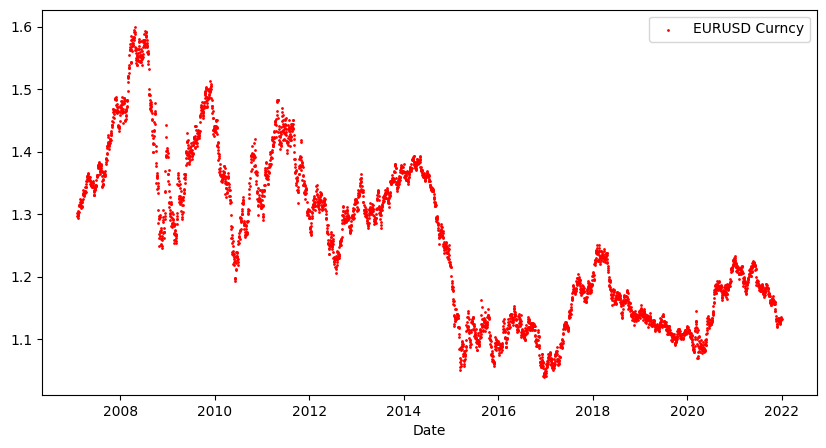

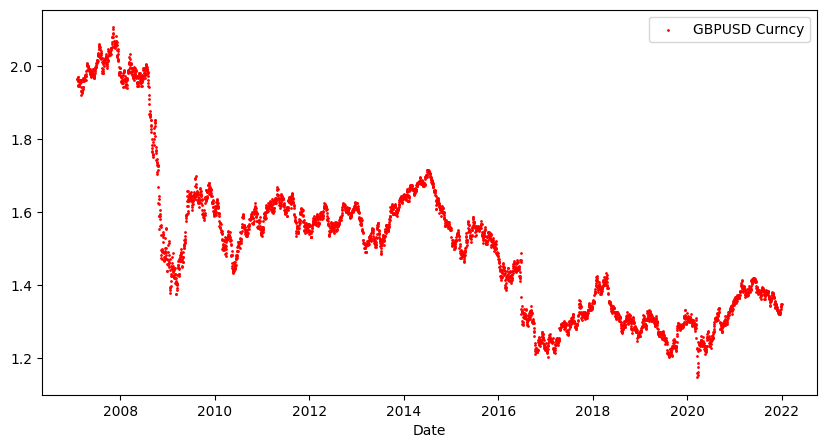

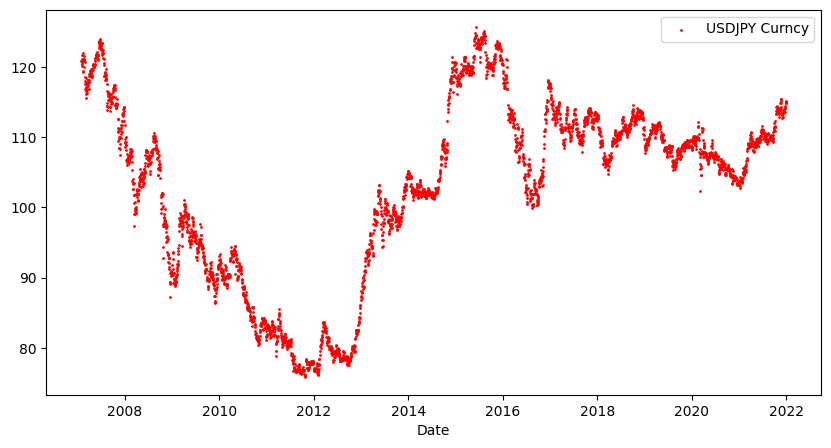

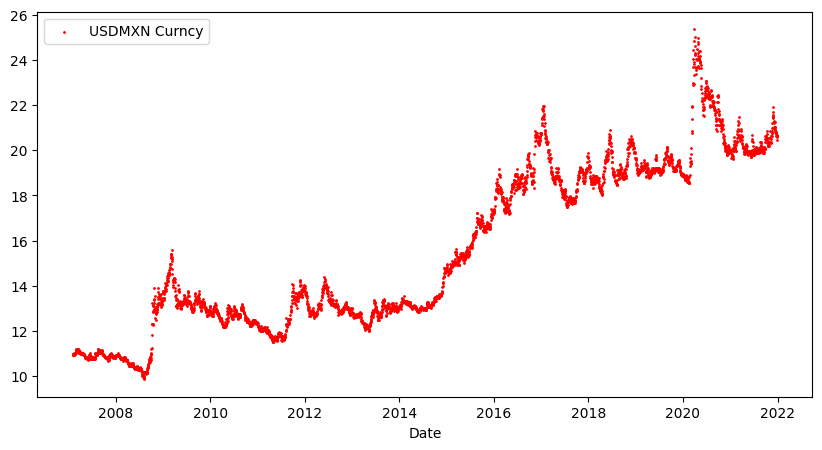

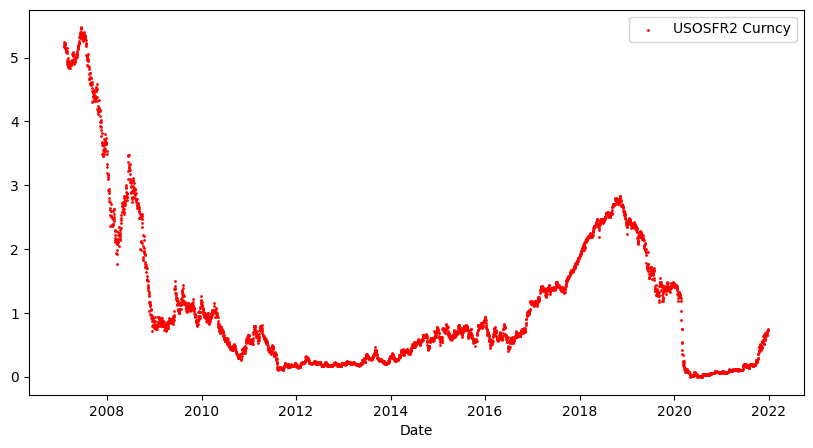

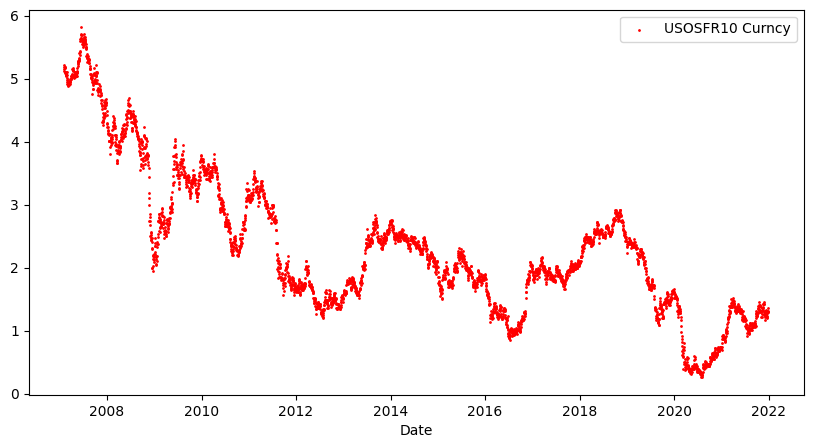

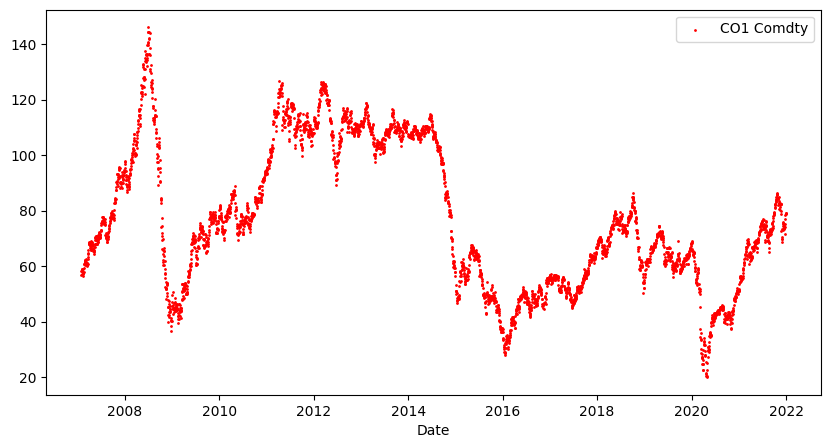

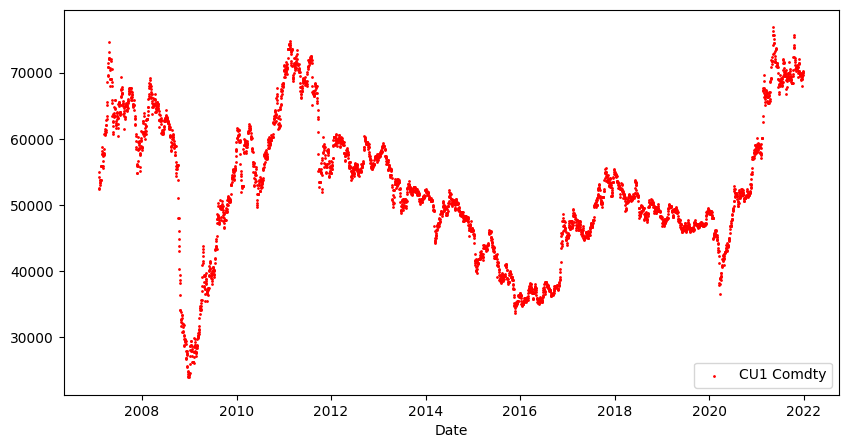

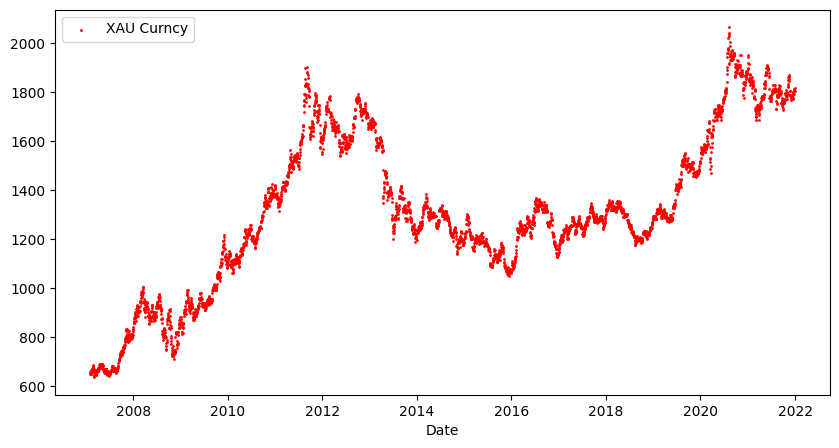

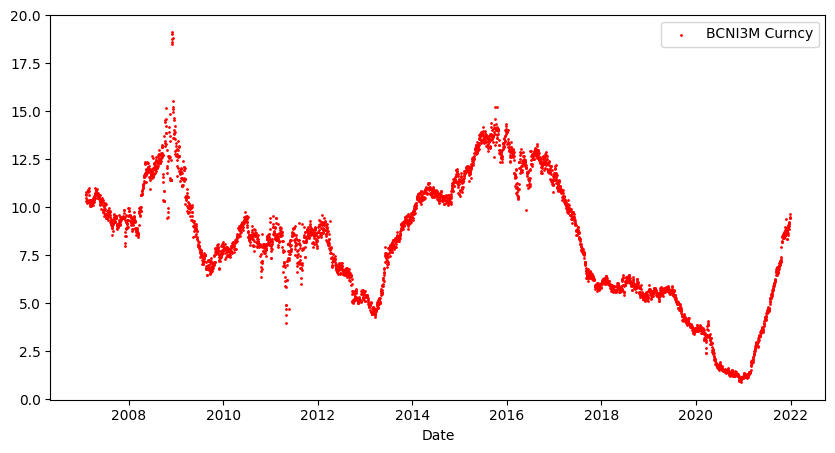

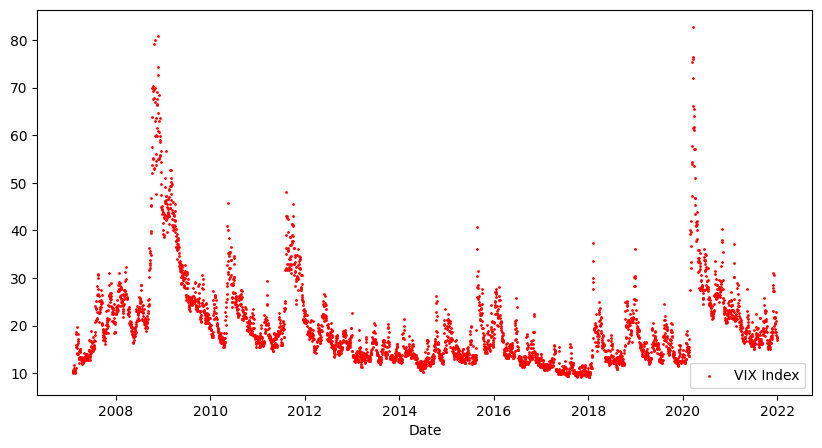

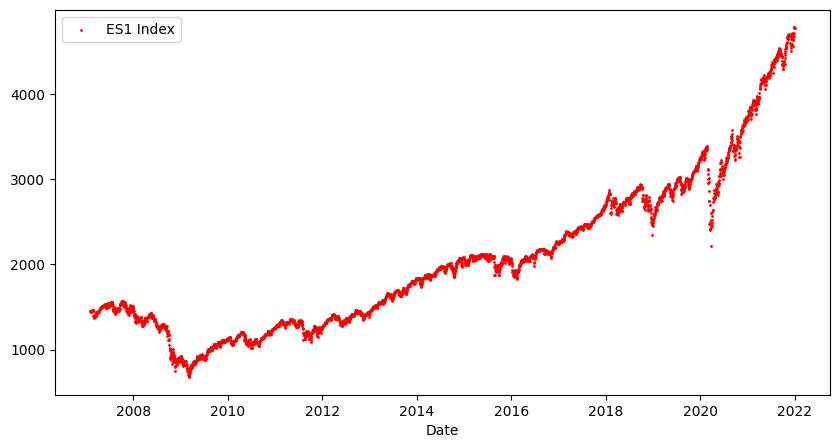

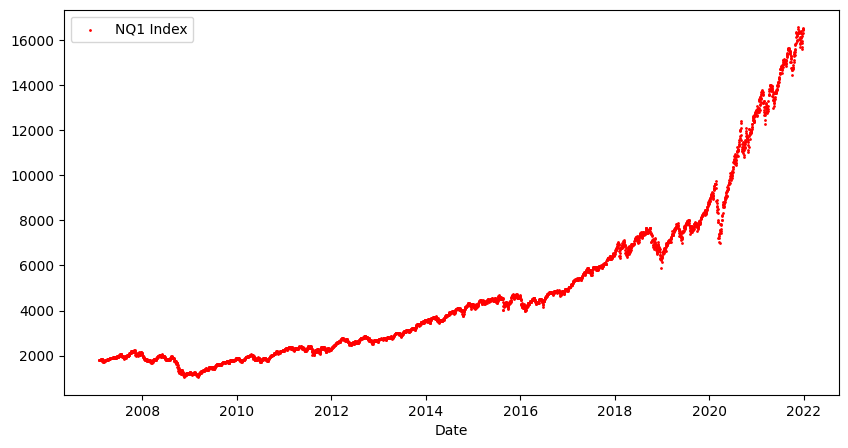

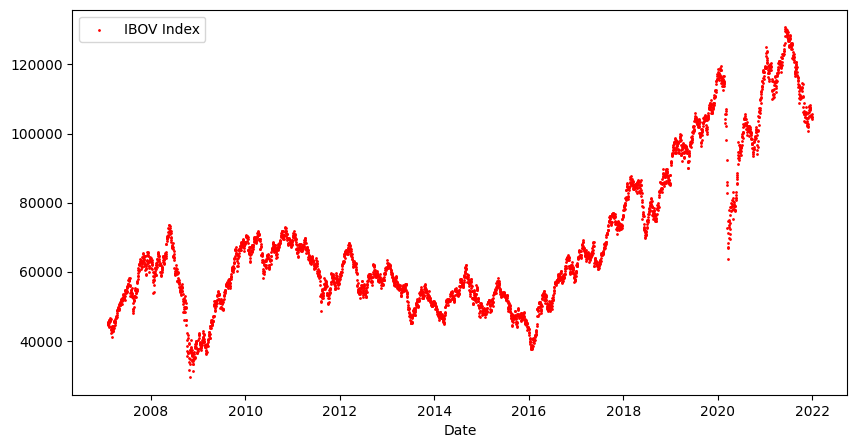

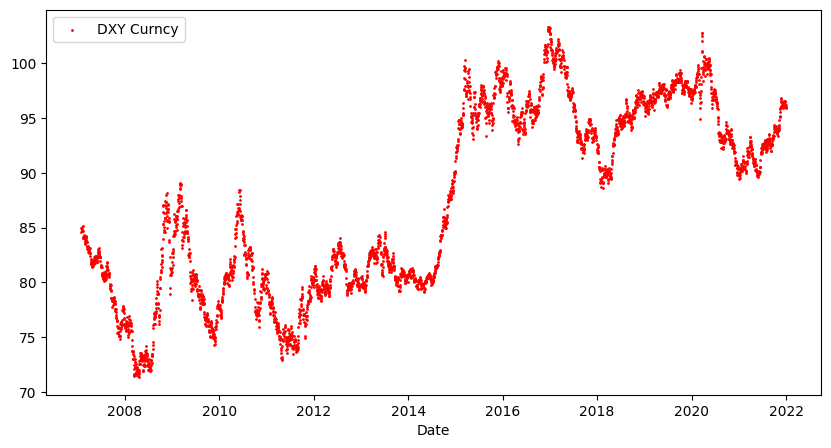

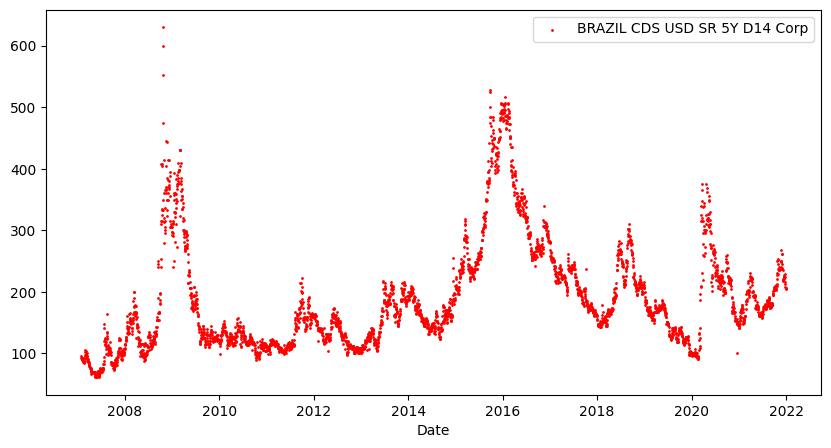

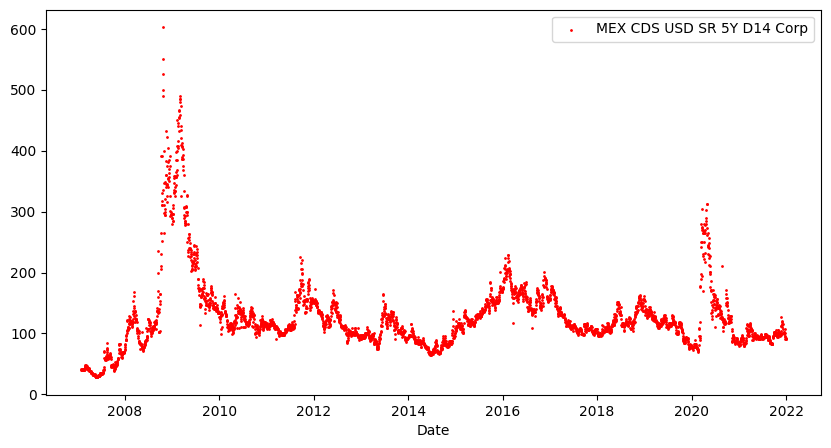

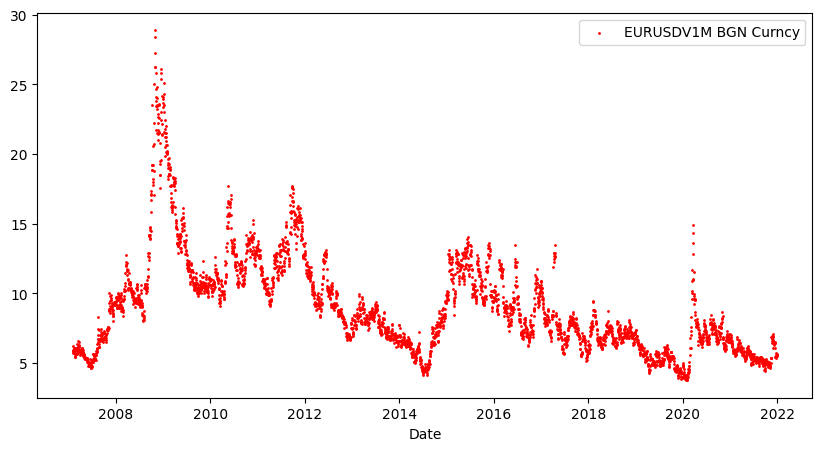

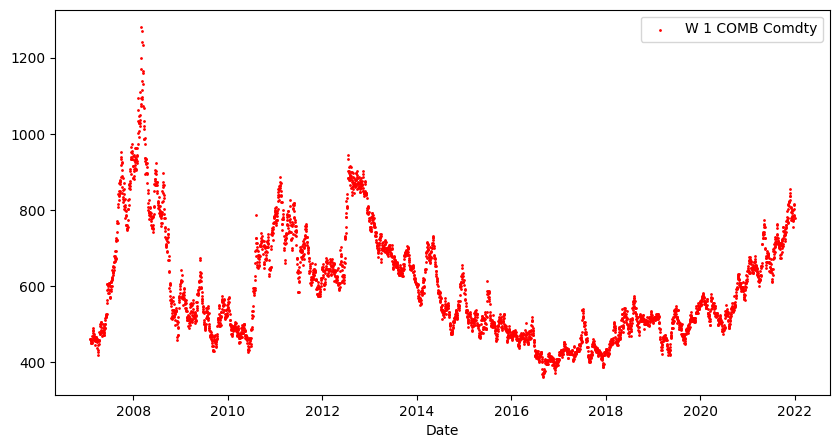

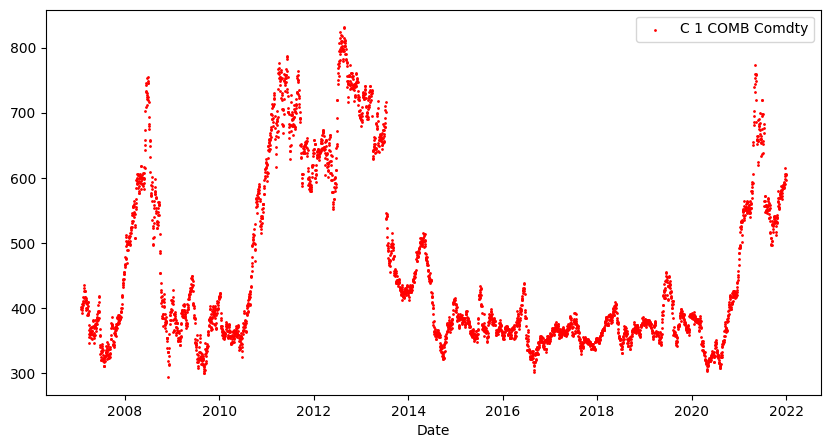

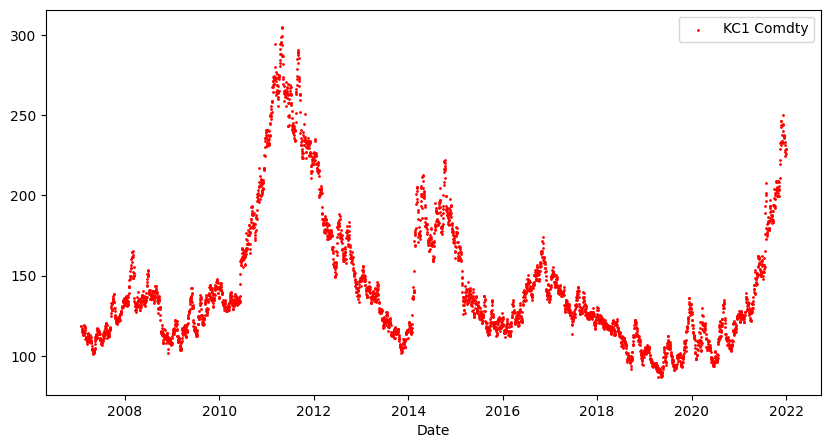

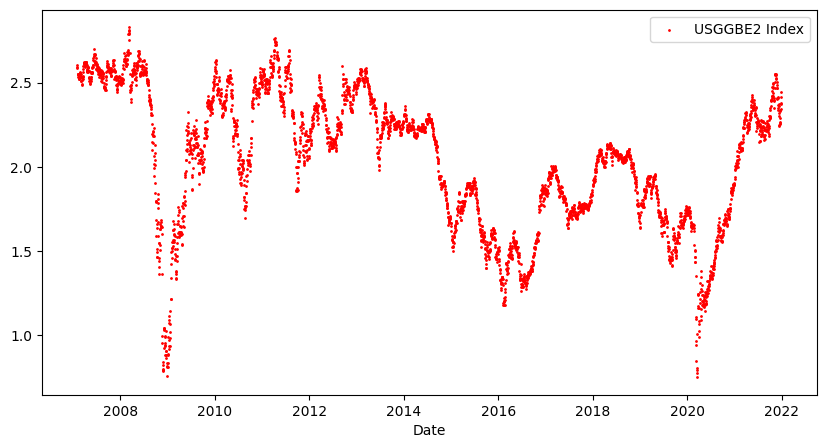

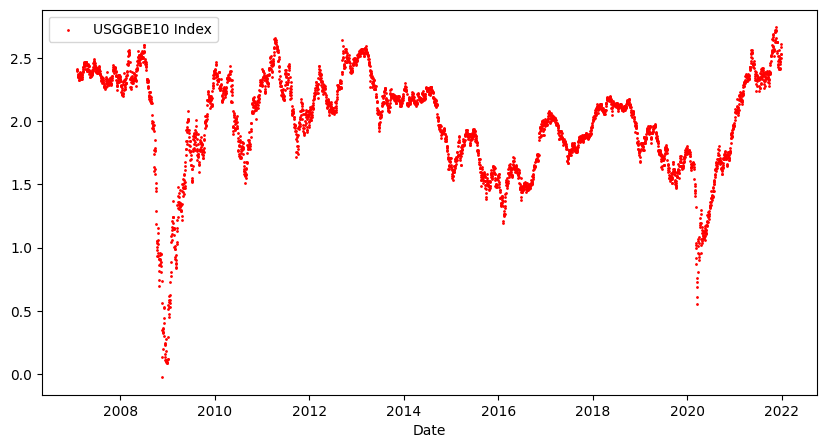

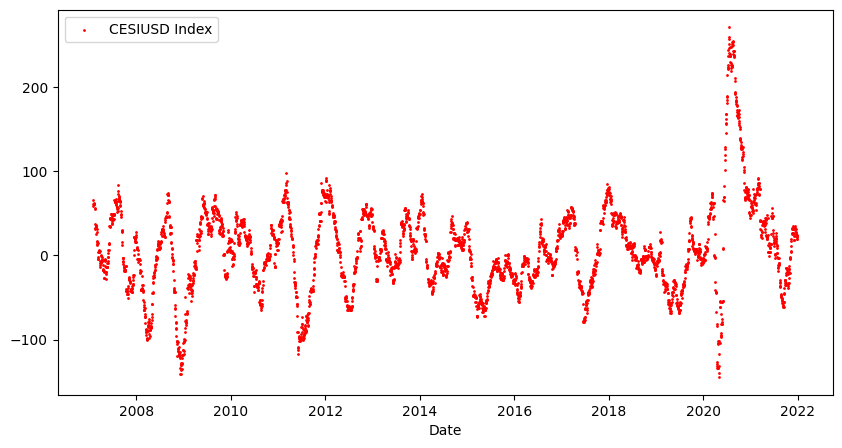

In [11]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

In [12]:
#вычисление таргета
#t_data['target']=(t_data['devprice']-t_data['devprice'].mean())/t_data['devprice'].std()
t_data['target']=round((t_data['devprice']-t_data['devprice'].min())*(10/(t_data['devprice'].max()-t_data['devprice'].min()))-5,0)
#t_data['target'] = np.where(t_data['target'] == -0.0, 0.0, t_data['target'])
new_columns = t_data.columns[:-1].to_list()
new_columns.insert(2, 'target')
t_data = t_data[new_columns]

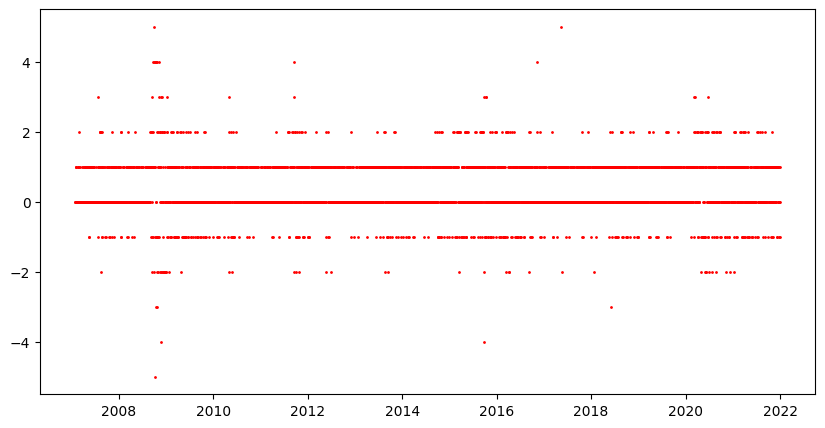

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.scatter(
    x=t_data['Date'],
    y=t_data['target'],
    s=1,
    marker='o',
    c = 'red',
    label=column
);

In [14]:
t_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,3755,2014-07-07 00:49:28.202396928,2007-02-01 00:00:00,2010-10-06 12:00:00,2014-07-07 00:00:00,2018-04-03 12:00:00,2021-12-30 00:00:00,NaN
devprice,3755.0,-0.00007,-0.07924,-0.005884,-0.000054,0.005883,0.068323,0.010827
target,3755.0,0.355792,-5.0,0.0,0.0,1.0,5.0,0.790976
EURUSD Curncy,3755.0,1.258541,1.0388,1.13435,1.2525,1.3582,1.5991,0.130565
GBPUSD Curncy,3755.0,1.519371,1.1485,1.3276,1.5245,1.61545,2.1075,0.213321
USDJPY Curncy,3755.0,102.798123,75.82,93.77,106.28,111.38,125.63,12.708885
USDMXN Curncy,3755.0,15.582906,9.8581,12.7652,13.8272,19.0268,25.3588,3.618855
USOSFR2 Curncy,3755.0,1.154606,-0.0092,0.2742,0.7157,1.46465,5.4752,1.204237
USOSFR10 Curncy,3755.0,2.329548,0.2612,1.55965,2.1072,2.81925,5.8163,1.130269
CO1 Comdty,3755.0,76.687822,19.99,56.125,71.9,102.905,146.08,25.579646


In [15]:
#выеление тестового набора для сохранения ненормализованных значений
n = len(t_data)
test_df_0 = t_data[int(n*0.8):]

In [16]:
# Преобразование datetime в дни
data_start=t_data['Date'].min()
t_data['Date'] = (t_data['Date'] - data_start).dt.days

In [17]:
#нормализация данных к диапазону от -5 до 5
t_data=t_data.drop('devprice', axis=1)
for column in t_data.columns:
    if column not in ['target']:
        t_data[column]=(t_data[column]-t_data[column].min())*(10/(t_data[column].max()-t_data[column].min()))-5

In [18]:
t_data.describe()

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,...,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,-0.018299,0.355792,-1.078147,-1.132734,0.416206,-1.306744,-2.877971,-1.276669,-0.503385,0.382795,...,-0.007693,-2.761811,-3.259460,-2.895205,-2.464340,-1.949080,-2.358160,1.191390,2.236623,-1.379354
std,2.892080,0.790976,2.330271,2.224411,2.551473,2.334640,2.195750,2.034651,2.028682,1.949508,...,2.647913,1.528968,1.064984,1.418559,1.533853,2.450175,1.907683,1.939460,1.472016,1.257578
min,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,-2.533052,0.000000,-3.294664,-3.132430,-1.396306,-3.124536,-4.483262,-2.662598,-2.134190,-0.706851,...,-2.265491,-3.880417,-3.792808,-3.899950,-3.618063,-3.726174,-3.639175,-0.258206,1.381417,-2.113625
50%,-0.018362,0.000000,-1.185972,-1.079249,1.115238,-2.439406,-3.678251,-1.676928,-0.883099,0.196821,...,-0.438679,-3.159432,-3.479401,-3.223992,-2.943417,-3.214784,-2.917526,1.445760,2.532538,-1.439576
75%,2.490819,1.000000,0.700518,-0.130865,2.139129,0.915023,-2.312650,-0.395132,1.575859,1.680545,...,2.564824,-2.121918,-3.008855,-2.180687,-1.517954,-0.176662,-1.607102,2.769035,3.333333,-0.657198
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}


train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]


In [20]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [21]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

In [23]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [25]:
#Одноступенчатые модели

In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [28]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [29]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


38/38 [==============================] - 0s 2ms/step - loss: 1.1600 - mean_absolute_error: 0.7600


In [30]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1,
    label_columns=['target'])



wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['target']

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 7, 1)


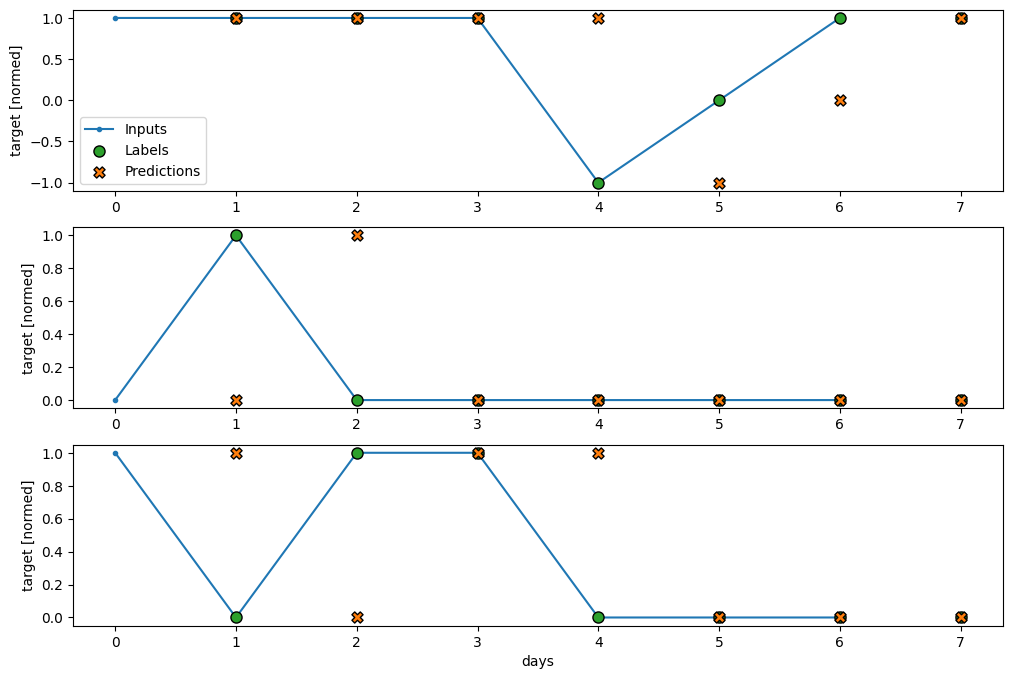

In [32]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

In [33]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [34]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


In [35]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [36]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 7.7913 - mean_absolute_error: 2.3529 - val_loss: 1.9032 - val_mean_absolute_error: 1.1234
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 2.9124 - mean_absolute_error: 1.4159 - val_loss: 2.8099 - val_mean_absolute_error: 1.4550
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 1.9229 - mean_absolute_error: 1.1185 - val_loss: 2.8818 - val_mean_absolute_error: 1.4973
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 1.5601 - mean_absolute_error: 0.9946 - val_loss: 2.5778 - val_mean_absolute_error: 1.4099
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 1.3273 - mean_absolute_error: 0.9069 - val_loss: 2.1217 - val_mean_absolute_error: 1.2582
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 1.1602 - mean_absolute_error: 0.8388 - val_loss: 1.8069 - val_mean_absolute_error: 1.1419
Epoch 7/10

In [37]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 7, 1)


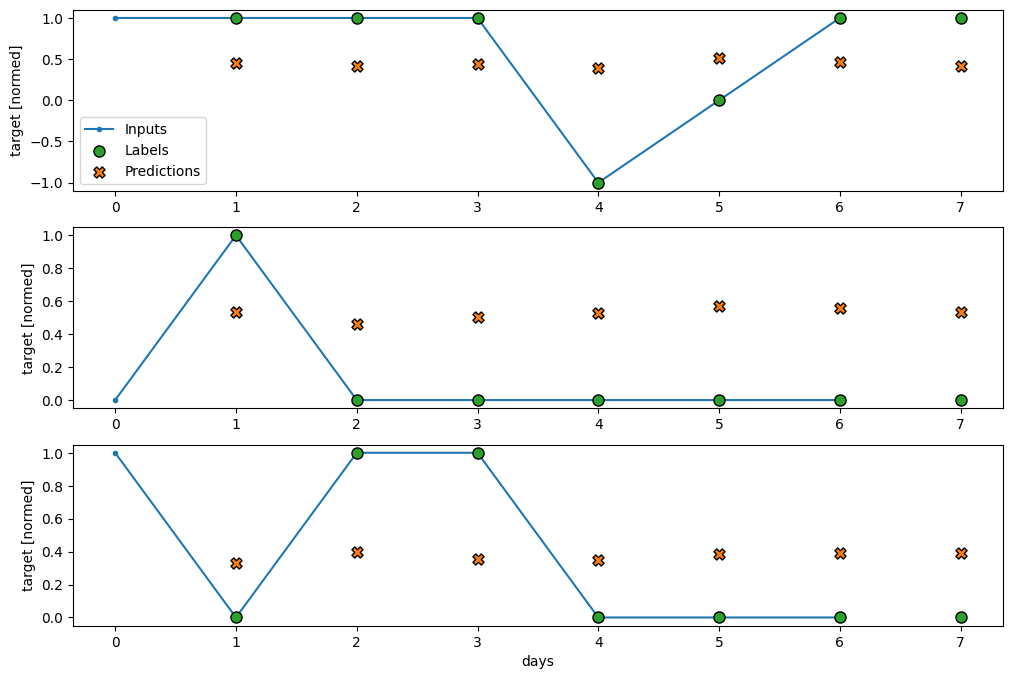

In [38]:
wide_window.plot(linear)


In [39]:
test_df

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
3110,2.994859,-0.0,-3.204533,-3.808133,1.396306,1.303586,-0.913135,-1.453709,-2.148069,-0.594247,...,2.812080,-2.552751,-2.835176,-3.569438,-3.337867,-3.396095,-4.289805,-0.744537,1.155821,-2.120847
3111,2.996695,1.0,-3.202749,-3.709072,1.562939,1.166883,-0.710743,-1.238232,-2.060036,-0.679410,...,2.772669,-2.711015,-2.974468,-3.770533,-3.302503,-3.335658,-4.315006,-0.371547,1.453724,-1.798267
3112,3.002203,0.0,-3.061753,-3.652763,1.605099,1.131207,-0.625046,-1.186207,-2.038623,-0.575322,...,2.612211,-2.851695,-3.131171,-3.789447,-3.305223,-3.349605,-4.262314,-0.270478,1.524946,-1.810303
3113,3.004040,-0.0,-3.120650,-3.715328,1.611122,1.125078,-0.535701,-1.126442,-1.928384,-0.580999,...,2.686341,-2.781355,-3.078937,-3.810353,-3.294342,-3.391446,-4.156930,-0.073154,1.670644,-1.735676
3114,3.005876,1.0,-2.938604,-3.640250,1.494680,1.042114,-0.586755,-1.168026,-1.712666,-0.533687,...,2.472397,-2.930828,-3.209523,-3.723743,-3.269859,-3.354254,-4.145475,-0.039465,1.687997,-1.723640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,4.987147,-0.0,-3.324112,-2.994786,2.743425,1.957879,-3.672234,-3.116326,-0.490523,3.671461,...,2.722624,-2.350523,-3.862454,-4.378795,-0.062568,0.806602,1.623139,2.650399,4.108098,-0.943669
3887,4.994491,0.0,-3.322327,-2.960375,2.839791,1.987620,-3.638502,-3.149808,-0.351733,3.635503,...,2.745770,-2.420863,-3.897277,-4.259333,-0.179543,0.973966,1.432990,2.836654,4.245842,-0.967742
3888,4.996328,1.0,-3.354453,-2.967675,2.829753,1.959621,-3.636679,-3.140628,-0.324768,3.747161,...,2.779863,-2.456033,-3.879866,-4.289199,-0.402612,0.788006,1.366552,2.801521,4.234635,-0.996630
3889,4.998164,-1.0,-3.284847,-2.909281,2.855852,1.911301,-3.624462,-3.018578,-0.301769,3.714989,...,2.694473,-2.438448,-3.897277,-4.290194,-0.356366,0.801953,1.517755,3.012802,4.434924,-1.037554


In [40]:
target_ln=linear.predict(test_df)
target_ln.shape
target_ln

24/24 [==============================] - 0s 1ms/step


array([[-1.37228921e-01],
       [-1.90635994e-01],
       [-1.38804406e-01],
       [-1.51008099e-01],
       [-2.00846672e-01],
       [-1.37087435e-01],
       [-1.24328688e-01],
       [-1.49850160e-01],
       [-1.55170590e-01],
       [-1.45309806e-01],
       [-1.59303427e-01],
       [-1.27331272e-01],
       [-1.78911507e-01],
       [-1.09808668e-01],
       [-1.48799613e-01],
       [-8.57553333e-02],
       [-9.80147421e-02],
       [-7.89334327e-02],
       [-6.66826367e-02],
       [-9.28649008e-02],
       [-1.42961517e-01],
       [-1.40041843e-01],
       [-9.55972597e-02],
       [-1.54156998e-01],
       [-1.38168827e-01],
       [-1.09248310e-01],
       [-1.06410094e-01],
       [-6.22269809e-02],
       [-1.26616180e-01],
       [-8.81259292e-02],
       [-8.97169933e-02],
       [-1.22035049e-01],
       [-4.91826981e-02],
       [-9.30350572e-02],
       [-9.64467376e-02],
       [-5.28291091e-02],
       [-4.49067950e-02],
       [-3.26290280e-02],
       [-4.5

In [41]:
df_ln = test_df_0.iloc[0:, 0:3]
df_ln

,Date,devprice,target
3110,2019-01-03,-0.011925,-0.0
3111,2019-01-04,0.004499,1.0
3112,2019-01-07,-0.005172,0.0
3113,2019-01-08,-0.009103,-0.0
3114,2019-01-09,0.008258,1.0
...,...,...,...
3885,2021-12-23,-0.008289,-0.0
3887,2021-12-27,-0.000938,0.0
3888,2021-12-28,0.011402,1.0
3889,2021-12-29,-0.022419,-1.0


In [42]:
df_ln.loc[:,'target_ln']=target_ln
#df_ln['Date']=df_ln['Date'].apply(lambda x: data_start + pd.Timedelta(days=x))
df_ln = df_ln[['Date', 'devprice', 'target', 'target_ln']]
df_ln['pnl']=(df_ln['target_ln']/5)*df_ln['devprice']
df_ln['sum']=df_ln["pnl"].cumsum()
sharp=(df_ln['sum'].mean()*255**0.5)/df_ln['sum'].std()
print(df_ln, sharp)


           Date  devprice  target  target_ln       pnl       sum
3110 2019-01-03 -0.011925    -0.0  -0.137229  0.000327  0.000327
3111 2019-01-04  0.004499     1.0  -0.190636 -0.000172  0.000156
3112 2019-01-07 -0.005172     0.0  -0.138804  0.000144  0.000299
3113 2019-01-08 -0.009103    -0.0  -0.151008  0.000275  0.000574
3114 2019-01-09  0.008258     1.0  -0.200847 -0.000332  0.000243
...         ...       ...     ...        ...       ...       ...
3885 2021-12-23 -0.008289    -0.0  -0.376427  0.000624 -0.065725
3887 2021-12-27 -0.000938     0.0  -0.372229  0.000070 -0.065655
3888 2021-12-28  0.011402     1.0  -0.395015 -0.000901 -0.066556
3889 2021-12-29 -0.022419    -1.0  -0.273534  0.001226 -0.065329
3890 2021-12-30  0.000814     0.0  -0.324117 -0.000053 -0.065382

[751 rows x 6 columns] -22.02264523191945


In [43]:
# плотный слой

In [44]:
CONV_WIDTH = 7
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

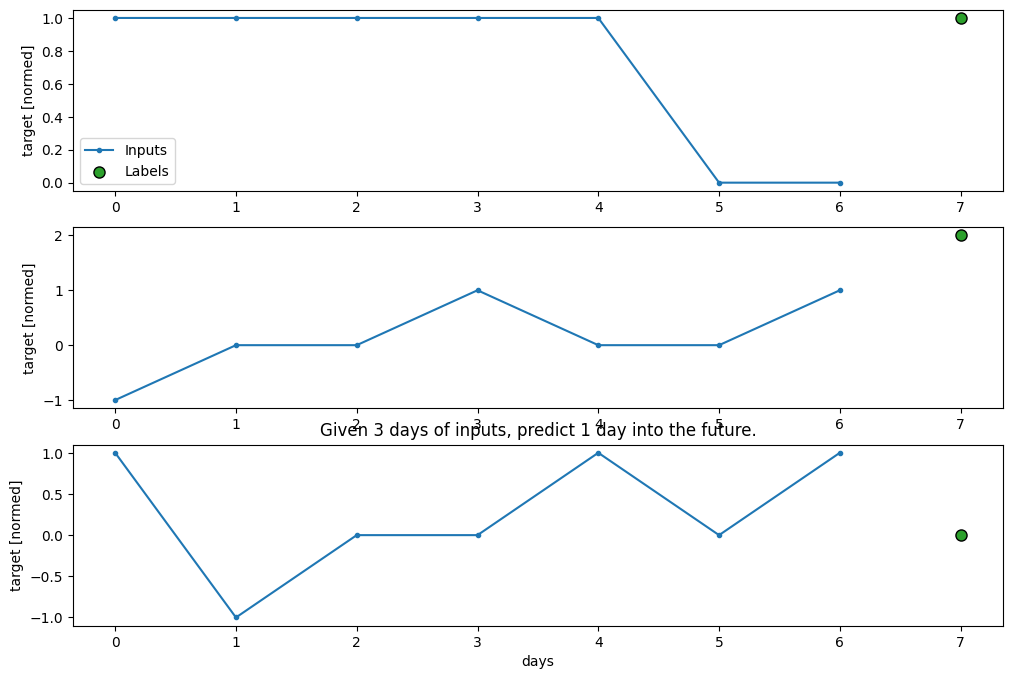

In [45]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [46]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [47]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 1, 1)


In [48]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 0.7879 - mean_absolute_error: 0.6667 - val_loss: 0.6223 - val_mean_absolute_error: 0.6176
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6915 - mean_absolute_error: 0.6323 - val_loss: 0.5864 - val_mean_absolute_error: 0.6011
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6683 - mean_absolute_error: 0.6309 - val_loss: 0.6222 - val_mean_absolute_error: 0.6139
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6581 - mean_absolute_error: 0.6281 - val_loss: 0.6489 - val_mean_absolute_error: 0.6287
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6530 - mean_absolute_error: 0.6250 - val_loss: 0.6680 - val_mean_absolute_error: 0.6731
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6551 - mean_absolute_error: 0.6276 - val_loss: 0.6752 - val_mean_absolute_error: 0.6740
Epoch 7/10

In [49]:
from IPython.display import clear_output

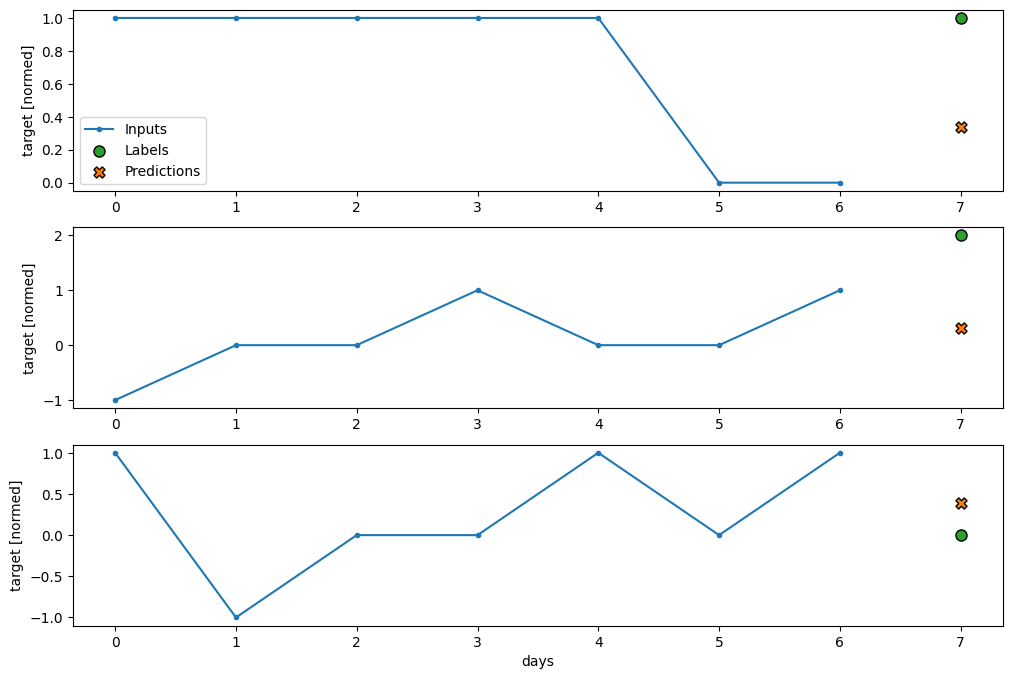

In [50]:
conv_window.plot(multi_step_dense)


In [51]:
test_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['target'])
target_msd_0=multi_step_dense.predict(test_window.test)
target_msd_0.shape

38/38 [==============================] - 0s 2ms/step


(744, 1, 1)

In [52]:
target_msd = np.squeeze(target_msd_0)
df_msd = test_df_0.iloc[7:, 0:3]
df_msd['target_msd']=target_msd
df_msd = df_msd[['Date', 'devprice', 'target', 'target_msd']]
df_msd['pnl']=(df_msd['target_msd']/5)*df_msd['devprice']
df_msd['sum']=df_msd["pnl"].cumsum()
sharp=(df_msd['sum'].mean()*255**0.5)/df_msd['sum'].std()
print(df_msd, sharp)

           Date  devprice  target  target_msd       pnl       sum
3117 2019-01-14  0.005943     1.0    1.248125  0.001484  0.001484
3118 2019-01-15  0.004417     1.0    1.108455  0.000979  0.002463
3119 2019-01-16  0.002390     1.0    1.402343  0.000670  0.003133
3120 2019-01-17  0.002175     1.0    1.016647  0.000442  0.003575
3121 2019-01-18  0.001453     0.0   -0.083988 -0.000024  0.003551
...         ...       ...     ...         ...       ...       ...
3885 2021-12-23 -0.008289    -0.0    1.093561 -0.001813  0.021040
3887 2021-12-27 -0.000938     0.0    0.950159 -0.000178  0.020862
3888 2021-12-28  0.011402     1.0    1.096391  0.002500  0.023362
3889 2021-12-29 -0.022419    -1.0    1.034903 -0.004640  0.018722
3890 2021-12-30  0.000814     0.0    1.048941  0.000171  0.018893

[744 rows x 6 columns] 28.61242875057813


In [53]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=25,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [54]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=25, kernel_size=(CONV_WIDTH,), activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),  # 10 нейронов для 10 классов
])

# Компиляция модели
conv_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Или 'categorical_crossentropy'
    metrics=['accuracy']
)

In [55]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 7, 26)
Output shape: (20, 1, 10)


In [56]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 2s 6ms/step - loss: 0.7148 - mean_absolute_error: 0.5774 - val_loss: 0.5940 - val_mean_absolute_error: 0.5468
Epoch 2/100
113/113 [==============================] - 1s 4ms/step - loss: 0.7140 - mean_absolute_error: 0.5774 - val_loss: 0.5939 - val_mean_absolute_error: 0.5468
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 0.7140 - mean_absolute_error: 0.5774 - val_loss: 0.5939 - val_mean_absolute_error: 0.5468
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.7140 - mean_absolute_error: 0.5774 - val_loss: 0.5939 - val_mean_absolute_error: 0.5468
Epoch 5/100
113/113 [==============================] - 1s 4ms/step - loss: 0.7140 - mean_absolute_error: 0.5774 - val_loss: 0.5939 - val_mean_absolute_error: 0.5468
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 0.7140 - mean_absolute_error: 0.5774 - val_loss: 0.5939 - val_mean_absolute_error: 0.5468
Epoch 7/10

In [57]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 7, 26)
Labels shape: (20, 7, 1)
Output shape: (20, 1, 10)


In [58]:
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 14
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['target']

In [59]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 13, 26)
Labels shape: (20, 7, 1)
Output shape: (20, 7, 10)


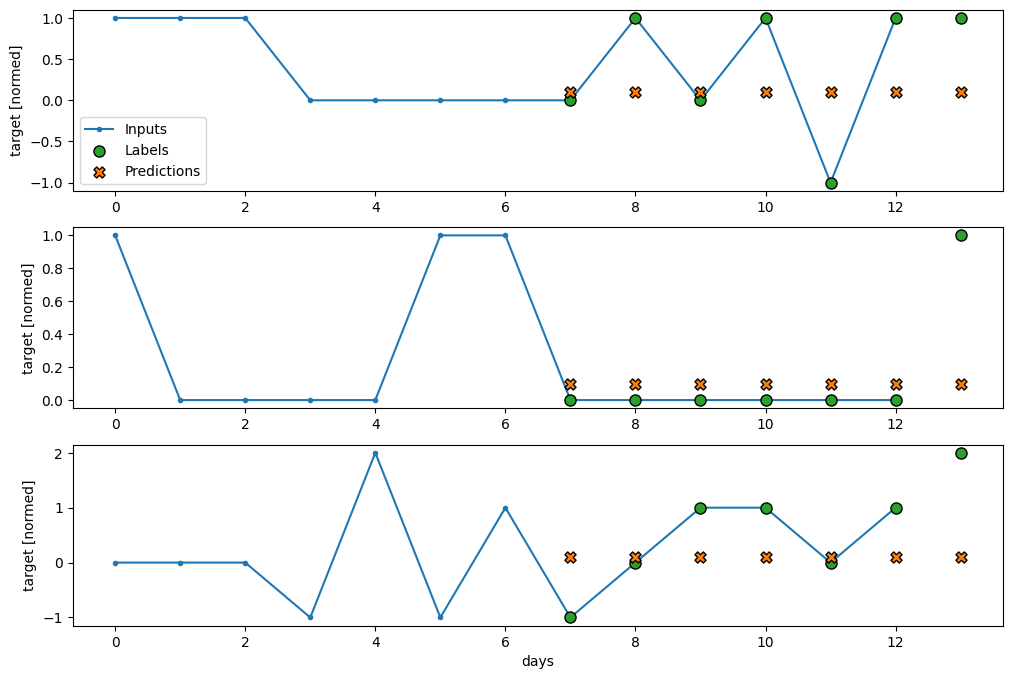

In [60]:
wide_conv_window.plot(conv_model)


In [61]:
test_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['target'])
target_conv_0=conv_model.predict(test_window.test)
target_conv_0.shape


38/38 [==============================] - 0s 2ms/step


(744, 1, 10)

In [62]:
target_conv = np.squeeze(target_conv_0)
df_conv = test_df_0.iloc[7:, 0:3]
df_conv['target_conv']=target_conv
df_conv = df_conv[['Date', 'devprice', 'target', 'target_conv']]
df_conv['pnl']=(df_conv['target_conv']/5)*df_conv['devprice']
df_conv['sum']=df_conv["pnl"].cumsum()
sharp=(df_conv['sum'].mean()*255**0.5)/df_conv['sum'].std()
print(df_conv, sharp)

ValueError: Expected a 1D array, got an array with shape (744, 10)

In [ ]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(25, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 7, 26)


Output shape: (20, 7, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 4s 10ms/step - loss: 0.5932 - mean_absolute_error: 0.5393 - val_loss: 0.5116 - val_mean_absolute_error: 0.5371
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 0.5488 - mean_absolute_error: 0.5195 - val_loss: 0.5118 - val_mean_absolute_error: 0.5384
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 0.5397 - mean_absolute_error: 0.5165 - val_loss: 0.5512 - val_mean_absolute_error: 0.5639
Epoch 4/100
113/113 [==============================] - 1s 6ms/step - loss: 0.5294 - mean_absolute_error: 0.5130 - val_loss: 0.5829 - val_mean_absolute_error: 0.5842
Epoch 5/100
113/113 [==============================] - 1s 7ms/step - loss: 0.5232 - mean_absolute_error: 0.5108 - val_loss: 0.5767 - val_mean_absolute_error: 0.5806
Epoch 6/100
113/113 [==============================] - 1s 7ms/step - loss: 0.5172 - mean_absolute_error: 0.5087 - val_loss: 0.6879 - val_mean_absolute_error: 0.6493
Epoch 7/1

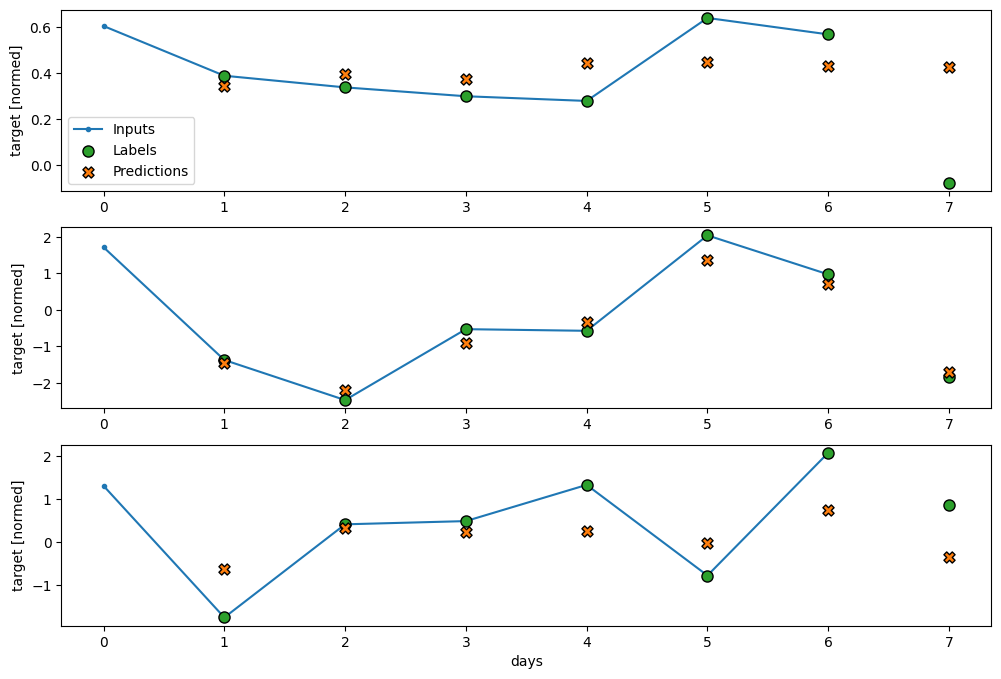

In [ ]:
wide_window.plot(lstm_model)


In [ ]:
test_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['target'])
target_rnn_0=conv_model.predict(test_window.test)
target_rnn_0.shape

38/38 [==============================] - 0s 1ms/step


(744, 1, 1)

In [ ]:
target_rnn = np.squeeze(target_rnn_0)
df_rnn = test_df_0.iloc[7:, 0:3]
df_rnn['target_rnn']=target_rnn
df_rnn = df_rnn[['Date', 'devprice', 'target', 'target_rnn']]
df_rnn['pnl']=(df_rnn['target_rnn']/5)*df_rnn['devprice']
df_rnn['sum']=df_rnn["pnl"].cumsum()
sharp=(df_rnn['sum'].mean()*255**0.5)/df_rnn['sum'].std()
print(df_rnn, sharp)

           Date  devprice    target  target_rnn       pnl       sum
3117 2019-01-14  0.005943  0.772646    0.225797  0.000268  0.000268
3118 2019-01-15  0.004417  0.669242    0.261662  0.000231  0.000500
3119 2019-01-16  0.002390  0.531850    0.561702  0.000268  0.000768
3120 2019-01-17  0.002175  0.517264    0.459772  0.000200  0.000968
3121 2019-01-18  0.001453  0.468379    1.787474  0.000519  0.001487
...         ...       ...       ...         ...       ...       ...
3885 2021-12-23 -0.008289 -0.191822    1.156790 -0.001918  0.000936
3887 2021-12-27 -0.000938  0.306319    0.824617 -0.000155  0.000781
3888 2021-12-28  0.011402  1.142601    1.433307  0.003269  0.004050
3889 2021-12-29 -0.022419 -1.149354    0.007914 -0.000035  0.004014
3890 2021-12-30  0.000814  0.425076    0.044167  0.000007  0.004021

[744 rows x 6 columns] 8.2304869563999


In [ ]:
#Performance

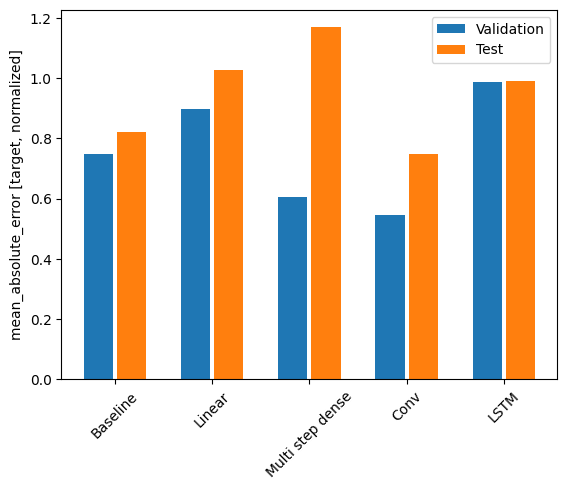

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.8219
Linear      : 1.0272
Multi step dense: 1.1688
Conv        : 0.7469
LSTM        : 0.9900
